## 2. Gaussian Kernel

In [14]:
from SVM import gaussian_kernel
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
fig_size = (12, 8)
fig_dpi = 100

计算高斯核函数

In [ ]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

加载数据

In [16]:
data = loadmat('./data/ex6data2.mat')
x = data.get('X')
y = data.get('y')

x.shape, y.shape

((863, 2), (863, 1))

数据集可视化

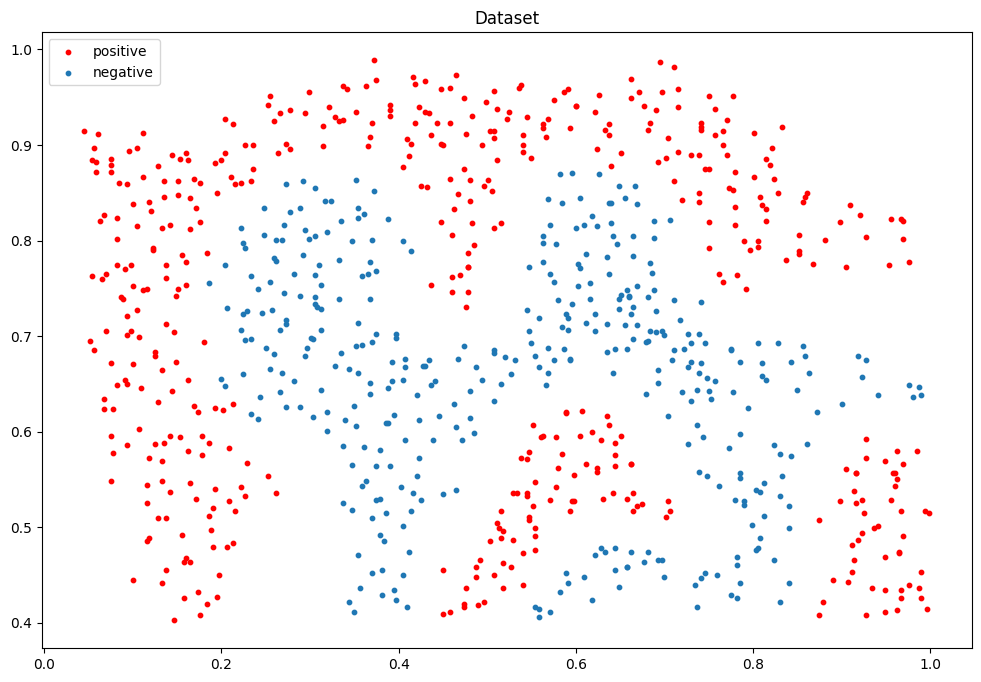

In [17]:
plt.figure(figsize=fig_size,dpi=fig_dpi)
positive_data_idx= np.where(y[:,0]==1)
positive_data = x[positive_data_idx]
negative_data_idx= np.where(y[:, 0] == 0)
negative_data = x[negative_data_idx]
plt.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
plt.title("Dataset")
plt.legend(loc=2)
plt.show()

In [18]:
from SVM import show_boundary

查看不同C，不同gamma的分类性能，和决策边界
gamma与高斯的$\sigma$成反比

              precision    recall  f1-score   support

           0     0.9791    0.9542    0.9665       393
           1     0.9625    0.9830    0.9726       470

    accuracy                         0.9699       863
   macro avg     0.9708    0.9686    0.9696       863
weighted avg     0.9701    0.9699    0.9698       863



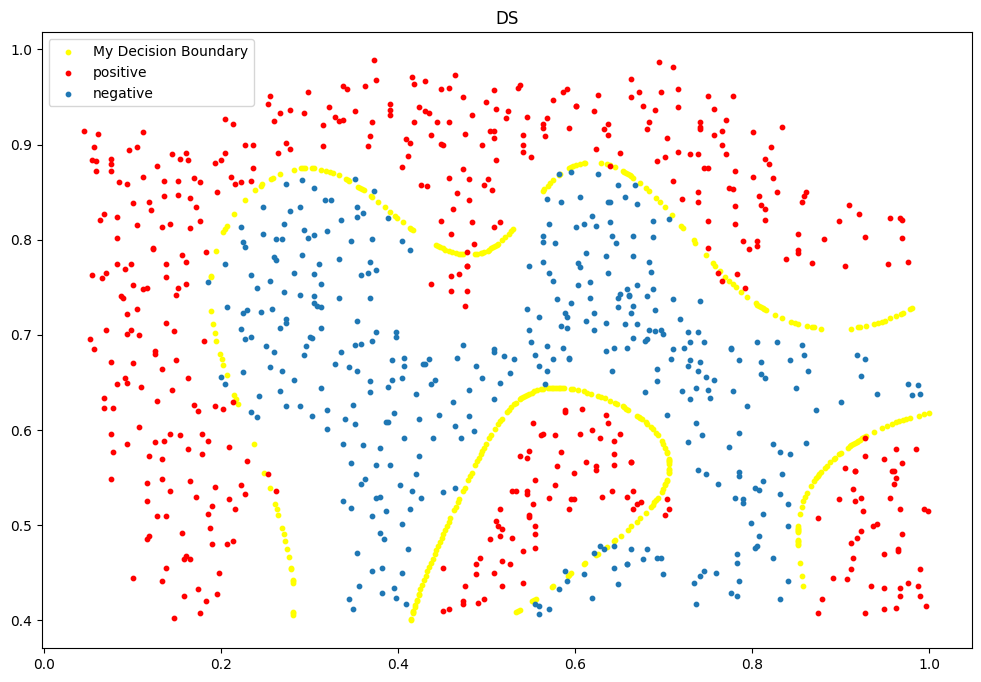

In [19]:
from sklearn import svm
from sklearn.metrics import classification_report
svc100 = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc100.fit(x,y.ravel())
report100 = classification_report(svc100.predict(x),y,digits=4)
print(report100)
show_boundary(svc100, scale=np.array([[0,1],[0.4,1]]), fig_size=fig_size, fig_dpi=fig_dpi,positive_data=positive_data,negative_data=negative_data, term=1e-3)

              precision    recall  f1-score   support

           0     0.8851    0.8582    0.8715       395
           1     0.8833    0.9060    0.8945       468

    accuracy                         0.8841       863
   macro avg     0.8842    0.8821    0.8830       863
weighted avg     0.8841    0.8841    0.8840       863



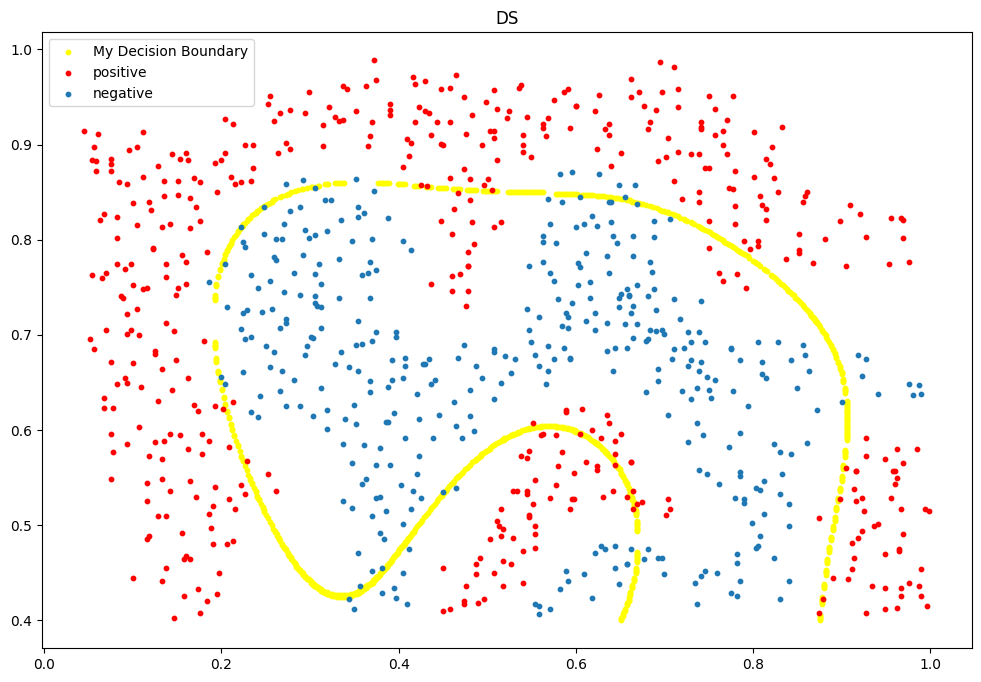

In [20]:

svc1 = svm.SVC(C=1, kernel="rbf", gamma=10, probability=True)
svc1.fit(x,y.ravel())
report1 = classification_report(svc1.predict(x),y,digits=4)
print(report1)
show_boundary(svc1, scale=np.array([[0,1],[0.4,1]]), fig_size=fig_size, fig_dpi=fig_dpi,positive_data=positive_data,negative_data=negative_data, term=1e-3)